#  Q2.  Implement the Lloyd's algorithm for k-means (30 points)

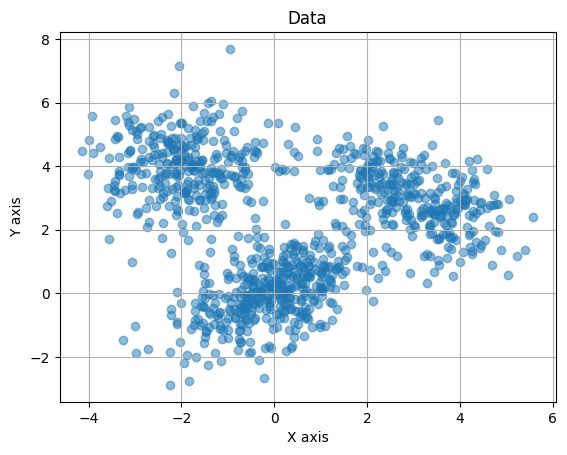

In [2]:
# First generate and visualize the input data


import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mixture components
means = [np.array([0, 0]), np.array([3, 3]), np.array([-2, 4])]
covs = [np.array([[1, 0.5], [0.5, 1]]), np.array([[1, -0.5], [-0.5, 1]]), np.array([[1, 0], [0, 1]])]
weights = [0.4, 0.3, 0.3]
num_samples = 1000

samples = []
for mean, cov, weight in zip(means, covs, weights):
    num_component_samples = int(weight * num_samples)
    component_samples = np.random.multivariate_normal(mean, cov, num_component_samples)
    samples.append(component_samples)

# Combine samples from all components
data = np.vstack(samples)

plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(data, k):
    # Randomly select k data points from the dataset as centroids


    indices = np.random.choice(data.shape[0], k, replace=False)


    return data[indices]

def assign_clusters(data, centroids):
    # Return a vector of integers in {0,1,2,3,...,k-1} to indicate the cluster assignments of data points
    # the vector should be of length as long as the data size

    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    clusters = np.argmin(distances, axis=1)

    return clusters

def update_centroids(data, clusters, k):
    # update the centroids

    new_centroids = []
    for i in range(k):
        points_in_cluster = data[clusters == i]
        if len(points_in_cluster) > 0:
            new_centroids.append(points_in_cluster.mean(axis=0))
        else:
            # If no points are assigned to a centroid, randomly re-initialize it
            new_centroids.append(data[np.random.choice(data.shape[0])])

    return np.array(new_centroids)

def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)

        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    return centroids, clusters






Centroids: [[-0.12770022 -0.00919444]
 [-1.91260743  4.03458947]
 [ 2.97580889  2.92806868]]


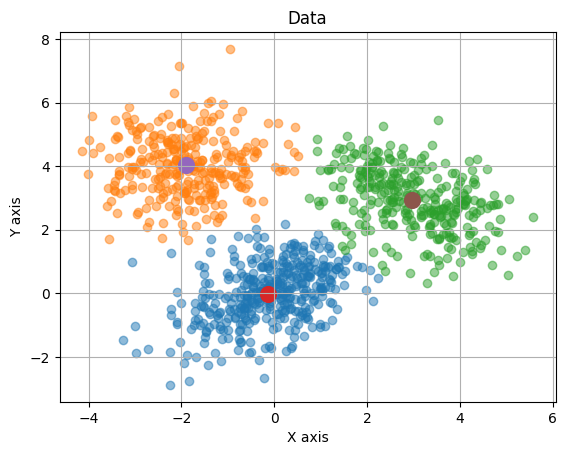

In [4]:
# If your implementation is valid, then the following should generate the clustering in colors.

k=3
centroids, clusters = kmeans(data,k)
print("Centroids:", centroids)
# Plot
colors =  plt.get_cmap("tab10")

for i in range(k):
    plt.scatter(data[clusters==i, 0], data[clusters==i, 1], color=colors(i), alpha=0.5)
for i in range(k):
    plt.scatter(centroids[i,0],centroids[i,1],marker='o',s=128,color=colors(i+k))
plt.title('Data')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.grid(True)
plt.show()


## Next, let's do clustering of a real data set "Olivetti faces".    The same function you implemented above should work on this dataset directly without changes.

1. Do you get the same results each time you run k-means?  Why?

2. Describe what you see when you adjust k.  You may reorganize the subplot layouts to see clearly.

3. What are the prominent differences you can see between the raw images and the "centroid faces"?



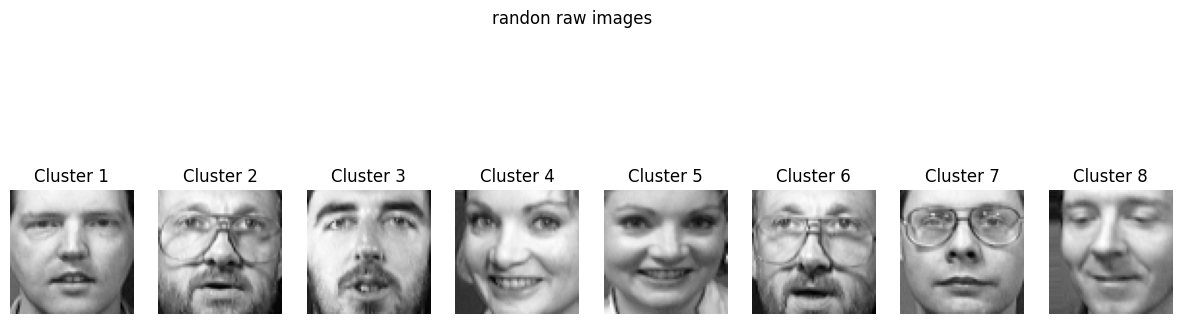

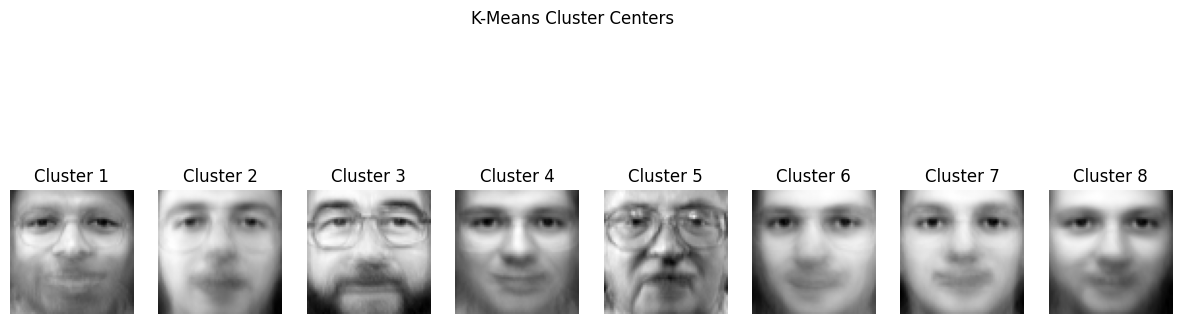

In [8]:
from sklearn.datasets import fetch_olivetti_faces

# We'll fetch the Olivetti faces dataset
data = fetch_olivetti_faces().data

k = 8 # number of clusters

random_imgs = initialize_centroids(data, k)

# Visualize the cluster centers as images
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(random_imgs ):
    plt.subplot(1, k, i + 1)
    plt.imshow(centroid.reshape(64, 64), cmap='gray')
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
plt.suptitle('randon raw images')
plt.show()




# Apply K-Means Clustering
centroids, _ = kmeans(data, k)

# Visualize the cluster centers as images
plt.figure(figsize=(15, 5))
for i, centroid in enumerate(centroids):
    plt.subplot(1, k, i + 1)
    plt.imshow(centroid.reshape(64, 64), cmap='gray')
    plt.title(f'Cluster {i+1}')
    plt.axis('off')
plt.suptitle('K-Means Cluster Centers')
plt.show()

